In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ls

HW1.pages*               adaline.ipynb            madaline.csv
NNDL-HW1.pdf             data.txt                 madaline.ipynb
README.md                linear-perceptron.ipynb  perceptron.csv


In [3]:
df = pd.read_csv('perceptron.csv')

In [4]:
df.head(3)

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0


Text(0.5, 1.0, 'Points divided by their target class')

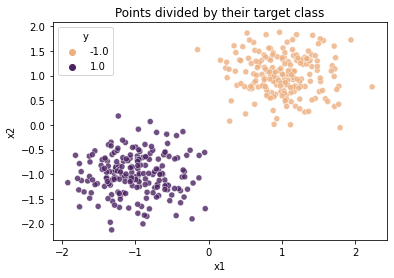

In [5]:
sns.scatterplot(data=df, x='x1', y='x2', alpha=0.8, hue='y', palette='flare')
plt.title('Points divided by their target class')

In [6]:
target_df = df.copy().pop('y')
train_df = df.copy()[['x1', 'x2']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, random_state=42, test_size=.25)

In [8]:
print('size of the training data: {}'.format(X_train.shape[0]))
print('size of the testing data: {}'.format(X_test.shape[0]))

size of the training data: 300
size of the testing data: 100


In [34]:
def forward_pass(inputs, W, theta):
    net = np.dot(inputs, W[:-1]) + W[-1]
    if net > theta:
        h = 1
    elif abs(net) <= theta:
        h = 0
    elif net < -theta:
        h = -1
    return h

In [61]:
def train_perceptron(X_train, y_train, theta, max_epochs):
    W = np.zeros(X_train.shape[1] + 1)
    lr = 0.1
    epochs = 1
    while True:
        errors = []
        if epochs % 100 == 0:
            print('epoch: {}'.format(epochs))
        epochs += 1
        for index in X_train.index:
            h = forward_pass(X_train.loc[index], W, theta)
            error = h - y_train.loc[index]
            if error != 0:
                errors.append(error)
                W[:-1] += lr*X_train.loc[index]*y_train.loc[index]
                W[-1] += lr*y_train.loc[index]
        if not any(errors) or epochs > max_epochs:
            break
    print(epochs)
    return W

In [62]:
def plot_dividing_lines(x, y1, y2, ax, df):
    sns.scatterplot(data=df, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y1, color='black', ax=ax)
    sns.lineplot(x=x, y=y2, color='black', ax=ax)

In [63]:
def find_dividing_line(X_train, y_train, df, theta, max_epochs=np.inf):
    W = train_perceptron(X_train, y_train, theta, max_epochs)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    y1 = (-W[0]*x - W[-1] + theta) / W[1]
    y2 = (-W[0]*x - W[-1] - theta) / W[1]
    return W, x, y1, y2

In [64]:
def find_misclassifieds(W, X_test, y_test, theta):
    misclassified_indices = []
    for index in X_test.index:
        h = forward_pass(X_test.loc[index], W, theta)
        if h != y_test.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

3


Text(0.5, 1.0, 'theta: 0 with 0 misclassified points - accuracy 1.0')

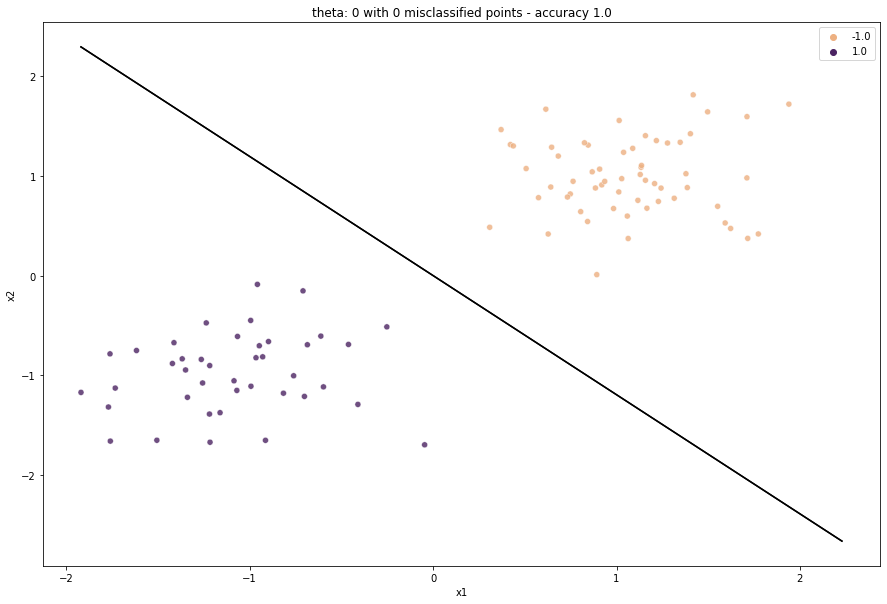

In [65]:
fig = plt.figure(figsize=(15, 10))
theta = 0
ax = plt.subplot(111)
W, x, y1, y2 = find_dividing_line(X_train, y_train, df, theta)
misclassified_indices = find_misclassifieds(W, X_test, y_test, theta)
plot_dividing_lines(x, y1, y2, ax, pd.concat([X_test, y_test], axis=1))
if len(misclassified_indices):
    sns.scatterplot(data=X_test.loc[misclassified_indices], x='x1', y='x2', ax=ax, color='green', markers='*')
ax.set_title('theta: {} with {} misclassified points - accuracy {}'
             .format(theta, 
                     len(misclassified_indices), 
                     (X_test.shape[0] - len(misclassified_indices)) / X_test.shape[0]))

# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')
# ax.get_legend().remove()

3
4
4
4


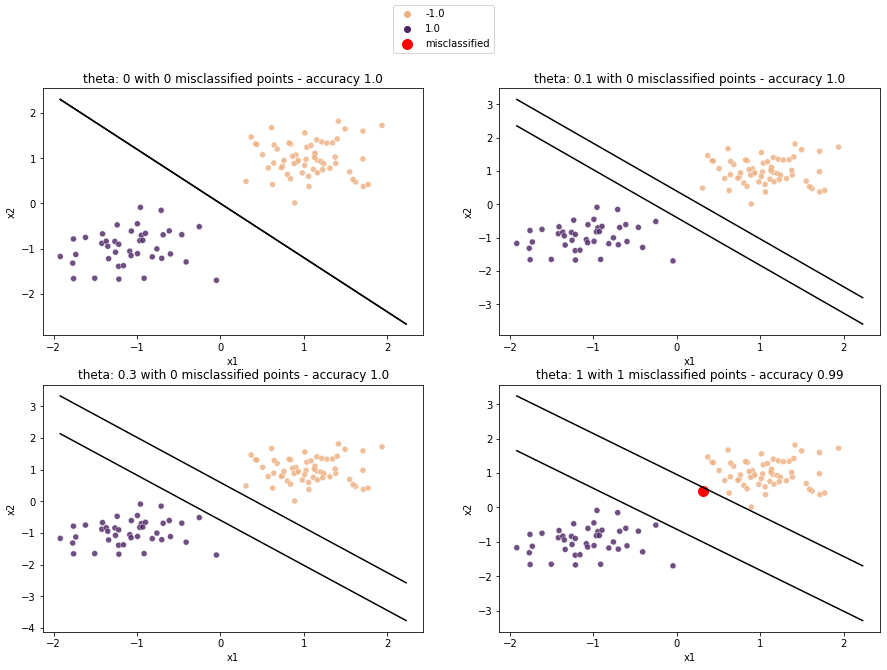

In [89]:
fig = plt.figure(figsize=(15, 10))
for i, theta in enumerate([0, .1, .3, 1]):
    ax = plt.subplot(2, 2, i + 1)
    W, x, y1, y2 = find_dividing_line(X_train, y_train, df, theta, 3)
    misclassified_indices = find_misclassifieds(W, X_test, y_test, theta)
    plot_dividing_lines(x, y1, y2, ax, pd.concat([X_test, y_test], axis=1))
    if len(misclassified_indices):
        ax.scatter(
            X_test.loc[misclassified_indices]['x1'], 
            X_test.loc[misclassified_indices]['x2'], 
            color='red', s=100, label='misclassified')
        
    ax.set_title('theta: {} with {} misclassified points - accuracy {}'
                 .format(theta, 
                         len(misclassified_indices), 
                         (X_test.shape[0] - len(misclassified_indices)) / X_test.shape[0]))
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
fig.legend(handles, labels, loc='upper center')